In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = fetch_20newsgroups()
X = data.data
y = data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [25]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test_tfidf)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       135
           1       0.72      0.80      0.76       166
           2       0.77      0.75      0.76       170
           3       0.70      0.75      0.73       182
           4       0.84      0.74      0.79       183
           5       0.82      0.89      0.85       169
           6       0.75      0.84      0.79       172
           7       0.83      0.89      0.86       191
           8       0.89      0.88      0.89       198
           9       0.89      0.95      0.92       168
          10       0.92      0.95      0.94       163
          11       0.99      0.92      0.95       195
          12       0.82      0.72      0.77       177
          13       0.93      0.90      0.92       172
          14       0.90      0.92      0.91       176
          15       0.72      0.94      0.81       182
          16       0.87      0.95      0.91

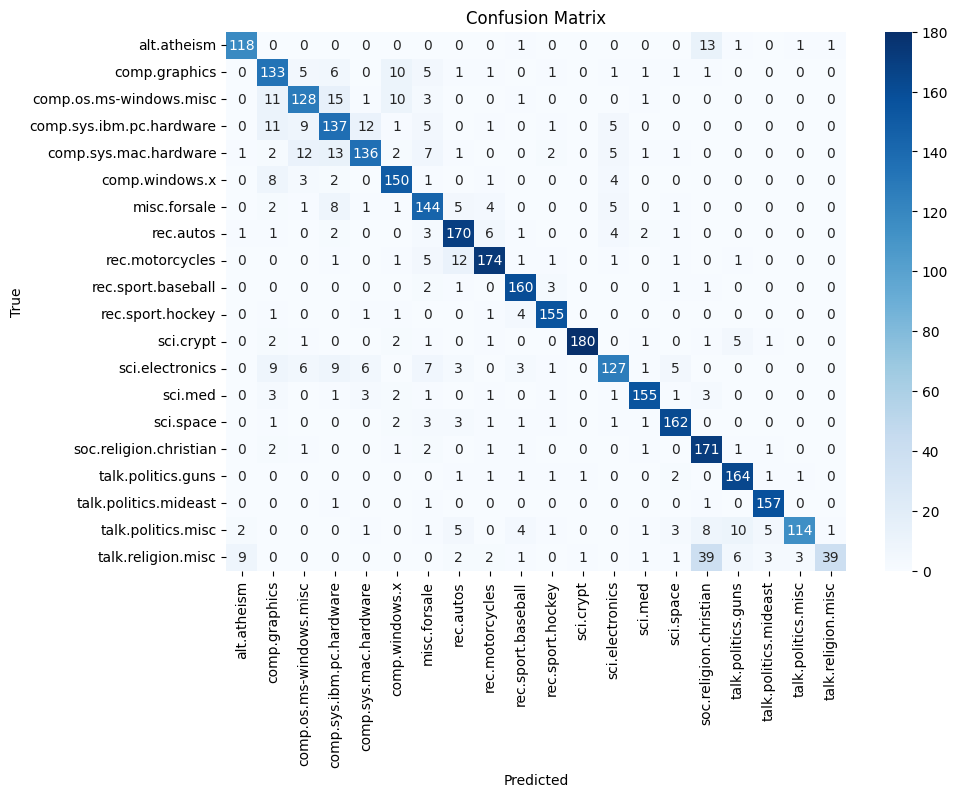

In [26]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
